In [1]:
import plotly.graph_objects as go
import networkx as nx

# reading input log file

test_name = "arldm_vistsis"
# test_name = "summer_sam_seq12f9s"
# 12p12f9s 
# summer_sam_seq6f9s summer_sam_seq12f9s
# seq9f9s 1p9f9s_run seq6f3s seq12f9s seq12f9s
# ddmd_12p4s_short ddmd_12p4s

stat_path=f"../example_stat/{test_name}"
image_path=f"{stat_path}/images"

In [2]:
# My util libs
import utils.task_order_parser as top
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vfd_stat2graph as vfd2g
import utils.vfd_graph2sankey as vfd2sk

# Improve Functions
## TODO
- MAYBE: Add adjustment of label to full label, file-task label, and no lables

## DONE
- DONE: Add task start option for graphs
    - Be careful about adding the required files??!!
- DONE: Add task cutoff option for graphs 
- DONE: (Maybe) add time for x-axis
- DONE: store the statistics to edges!!!

In [3]:
STAGE_START = 0
STAGE_END = 2


TASK_ORDER_LIST = top.load_task_order_list(stat_path)
STAGE_END = top.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = top.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS


STAGE_END is not in TASK_ORDER_LIST, set to max order: 1
TASK_ORDER_LIST = {'arldm_saveh5': 0, 'arldm_train': 1}


['arldm_saveh5', 'arldm_train']

In [4]:
vfd_files = sload.search_files_with_name(stat_path, "vfd")
# vfd_files = vfd_files[0:1]
print(vfd_files)


vfd_dict = sload.load_stat_yaml(vfd_files)
# print(vfd_dict)

print("loading yaml done")



['../example_stat/arldm_vistsis/1125135-vfd_data_stat.yaml', '../example_stat/arldm_vistsis/1125146-vfd_data_stat.yaml']
loading ../example_stat/arldm_vistsis/1125135-vfd_data_stat.yaml
loading ../example_stat/arldm_vistsis/1125146-vfd_data_stat.yaml
loading yaml done


In [5]:
G_VFD = nx.DiGraph()

G_VFD = vfd2g.add_task_file_nodes(G_VFD, vfd_dict, TASK_LISTS)

# # Print node in G_VFD
# print(f"Nodes in G_VFD : {G_VFD.nodes()}")

stat_file: ../example_stat/arldm_vistsis/1125135-vfd_data_stat.yaml
Unknown access_type: not_accessed
stat_file: ../example_stat/arldm_vistsis/1125146-vfd_data_stat.yaml


In [6]:
task_file_map = sload.load_task_file_map(stat_path, test_name, TASK_LISTS)

for task, stat in task_file_map.items():
    print(f"{task} : {stat}")

task_file_map = {'arldm_saveh5-1125135': {'input': [], 'io_cnt': 1065, 'order': 0, 'output': ['/home/mtang11/experiments/ARLDM/output_data/vistsis_out.h5']}, 'arldm_train-1125146': {'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'io_cnt': 156, 'order': 1, 'output': []}, 'arldm_train-1125219': {'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'io_cnt': 102, 'order': 1, 'output': []}}
arldm_saveh5-1125135 : {'input': [], 'io_cnt': 1065, 'order': 0, 'output': ['/home/mtang11/experiments/ARLDM/output_data/vistsis_out.h5']}
arldm_train-1125146 : {'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'io_cnt': 156, 'order': 1, 'output': []}
arldm_train-1125219 : {'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'io_cnt': 102, 'order': 1, 'output': []}


In [7]:
G_VFD = vfd2g.set_task_position(G_VFD, task_file_map)

task_name: arldm_saveh5-1125135, task_order: 0
node arldm_saveh5-1125135 : {'pos': (0, 0), 'rpos': 0, 'order': 2, 'type': 'task'}, pos: (0, 0)
node : arldm_saveh5-1125135, pos: (2, 0)
task_name: arldm_train-1125146, task_order: 1
node arldm_train-1125146 : {'pos': (0, 0), 'rpos': 0, 'order': 1, 'type': 'task'}, pos: (0, 0)
node : arldm_train-1125146, pos: (4, 0)
task_name: arldm_train-1125219, task_order: 1
node arldm_train-1125219 : {'pos': (0, 0), 'rpos': 0, 'order': 8, 'type': 'task'}, pos: (0, 0)
node : arldm_train-1125219, pos: (8, 1)


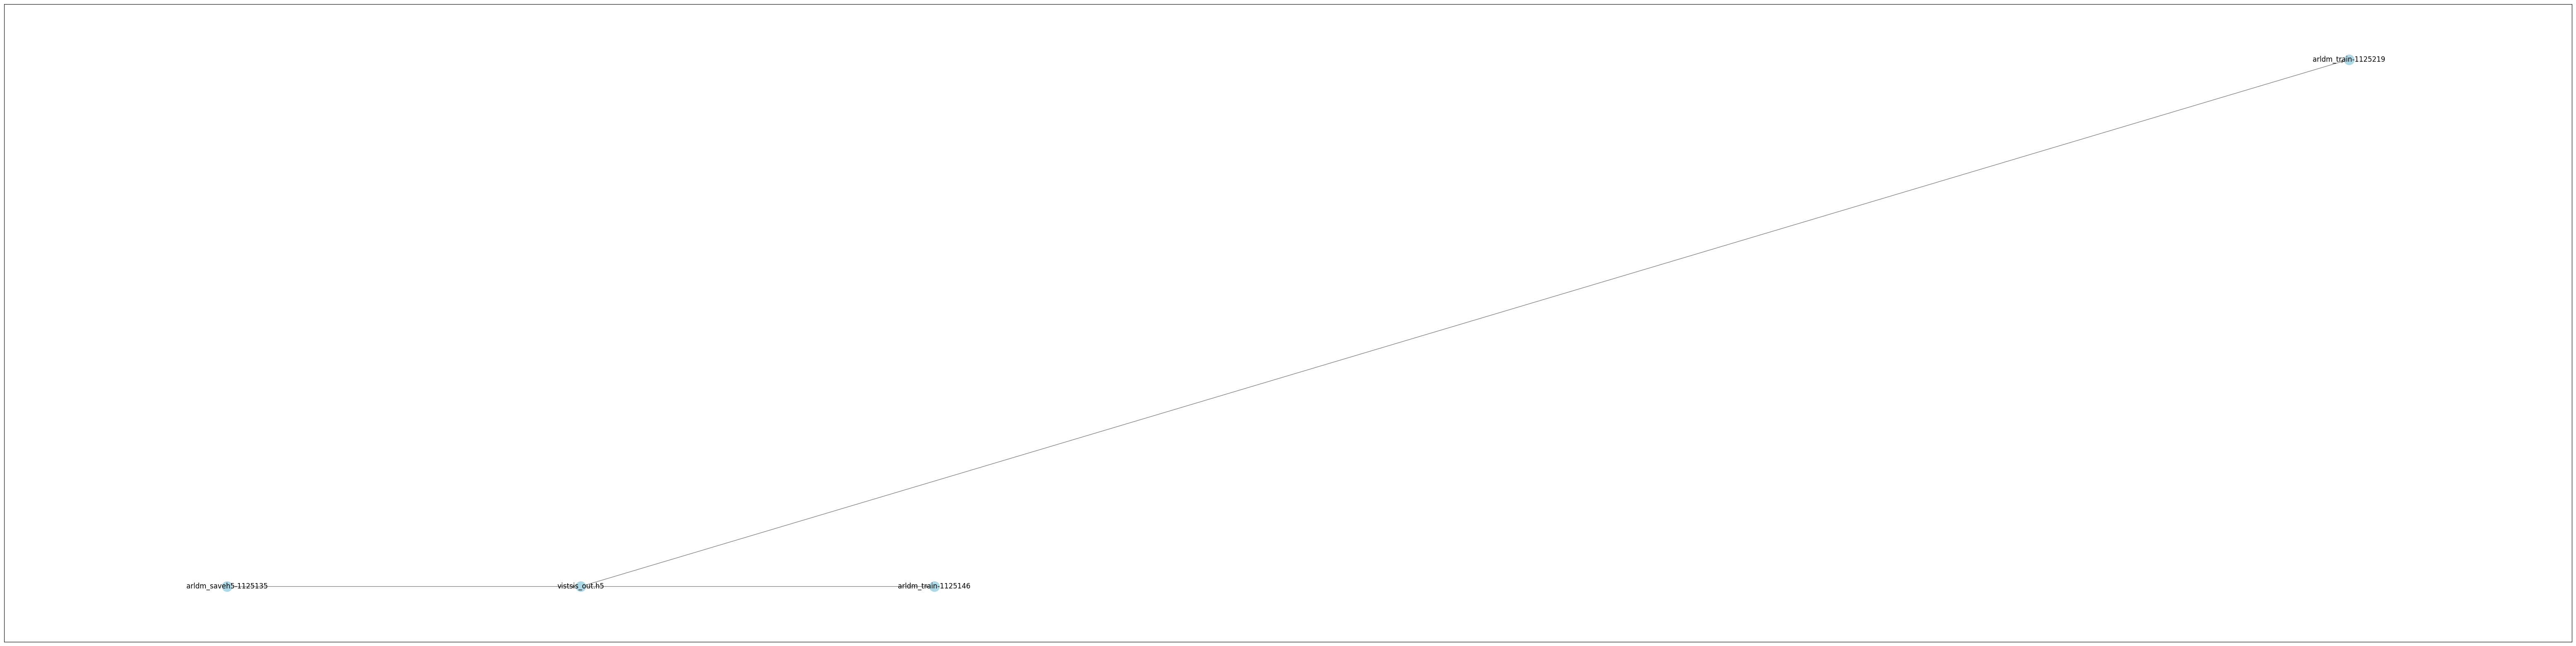

In [8]:
# sp.display_all_nodes_attr(G_VFD)
G_VFD = vfd2g.set_file_position(G_VFD, task_file_map)
# sp.display_all_nodes_attr(G_VFD)

sp.draw_graph(G_VFD, test_name, graph_type="vfd", prefix=f'{(STAGE_END+1)}s', save=True)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)




In [9]:
vfd2g.prepare_sankey_stat(G_VFD)

In [10]:
vfd2sk.time_to_file_x_pos(G_VFD)

All tasks:  ['arldm_saveh5-1125135', 'arldm_train-1125146', 'arldm_train-1125219']
vistsis_out.h5 New pos:  (3.0, 0)


In [16]:
vfd_nodes, vfd_nodes_dict = vfd2sk.get_nodes_for_sankey(G_VFD, label_on=True)

# print(vfd_nodes)

vfd_links = vfd2sk.get_links_for_sankey(G_VFD, vfd_nodes_dict, val_sqrt=False)
fig = go.Figure(go.Sankey(
            node = vfd_nodes,
            link = vfd_links, orientation='h'))

fig.update_layout(
    autosize=False,
    width=1200,
    height=200,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=2
    ),
    font=dict(size=18),
)

    
fig.show()
save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-labeled-s4.html"
fig.write_html(save_html_path)
print(f"Sankey saved to {save_html_path}")

bandwidth range: 2.44 MB/s ~ 20.31 MB/s


Sankey saved to ../example_stat/arldm_vistsis/vfd-2s-arldm_vistsis-sankey-labeled-s4.html


In [12]:
stat_str = sp.show_vfd_stats(G_VFD)
print(stat_str)


Total number of links: 3
Total I/O size: 150.81 MB
Total I/O count: 1111
Total bandwidth: 40.37 MB/s
Average I/O size: 135.74 KB
Medium I/O size: 2.65 MB
Inital input size: 0



In [13]:
# Show VFD Tracker overhead
vfd_dict = sload.load_stat_yaml(vfd_files)
sp.show_all_overhead("VFD", vfd_dict)

loading ../example_stat/arldm_vistsis/1125135-vfd_data_stat.yaml
loading ../example_stat/arldm_vistsis/1125146-vfd_data_stat.yaml
Total overhead: 1.0 ms


In [14]:
# Create a manual legend using annotations.

def add_legend_to_graph(fig,save_img=False):
    LEGEND_ITEMS = {
        "Tasks":{"color":"red", "text":"Tasks"},
        "Files":{"color":"blue", "text":"Files"},
        "Edges":{"color":"lightblue", "text":"File bandwidth, darker the color, higher the bandwidth"},
    }

    legend_items = [
        go.layout.Annotation(
            x=0.9,  # X-coordinate for legend item
            y=0.85 - i * 0.03,  # Y-coordinate for legend item (adjust for position)
            xref='paper',
            yref='paper',
            text=f"{item_type} - {LEGEND_ITEMS[item_type]['color']}",
            showarrow=False,
            font=dict(size=14, color=LEGEND_ITEMS[item_type]['color']),
            # bordercolor='grey',  # Set the border color for the legend box
            # borderwidth=1,  # Set the border width for the legend box
            bgcolor='rgba(255, 255, 255, 0.7)',  # Add a transparent background color
        )
        for i, item_type in enumerate(LEGEND_ITEMS.keys())
    ]
    fig.update_layout(annotations=legend_items)
    fig.show()
    if save_img:
        fig.write_html(f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-annotated.html")
